In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

%matplotlib inline

In [2]:
# data output display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3) 

# Dataset

In [3]:
federal_rates = pd.read_csv('federal.csv')
mortgage_rates = pd.read_csv('mortgage.csv')

# Merging the data

In [4]:
federal_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 4 columns):
DATE            904 non-null object
INTEREST        752 non-null float64
UNEMPLOYMENT    752 non-null float64
INFLATION       710 non-null float64
dtypes: float64(3), object(1)
memory usage: 28.3+ KB


In [5]:
mortgage_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
DATE        549 non-null object
MORTGAGE    549 non-null float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [6]:
rates = pd.merge(federal_rates, mortgage_rates, on='DATE', how='right')
rates

,DATE,INTEREST,UNEMPLOYMENT,INFLATION,MORTGAGE
0,1971-04-01,4.15,5.9,5.0,7.310
1,1971-05-01,4.63,5.9,5.2,7.425
2,1971-06-01,4.91,5.9,4.9,7.530
3,1971-07-01,5.31,6.0,4.9,7.604
4,1971-08-01,5.56,6.1,4.6,7.698
5,1971-09-01,5.55,6.0,4.4,7.688
6,1971-10-01,5.20,5.8,3.8,7.628
7,1971-11-01,4.91,6.0,3.3,7.550
8,1971-12-01,4.14,6.0,3.1,7.480
9,1972-01-01,3.50,5.8,3.1,7.438


In [7]:
#check for data types and null values
rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 548
Data columns (total 5 columns):
DATE            549 non-null object
INTEREST        549 non-null float64
UNEMPLOYMENT    549 non-null float64
INFLATION       549 non-null float64
MORTGAGE        549 non-null float64
dtypes: float64(4), object(1)
memory usage: 25.7+ KB


In [8]:
rates['DATE'] = pd.to_datetime(rates['DATE'])

In [9]:
rates.to_csv('rates.csv', index=False)

# Scatterplot

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


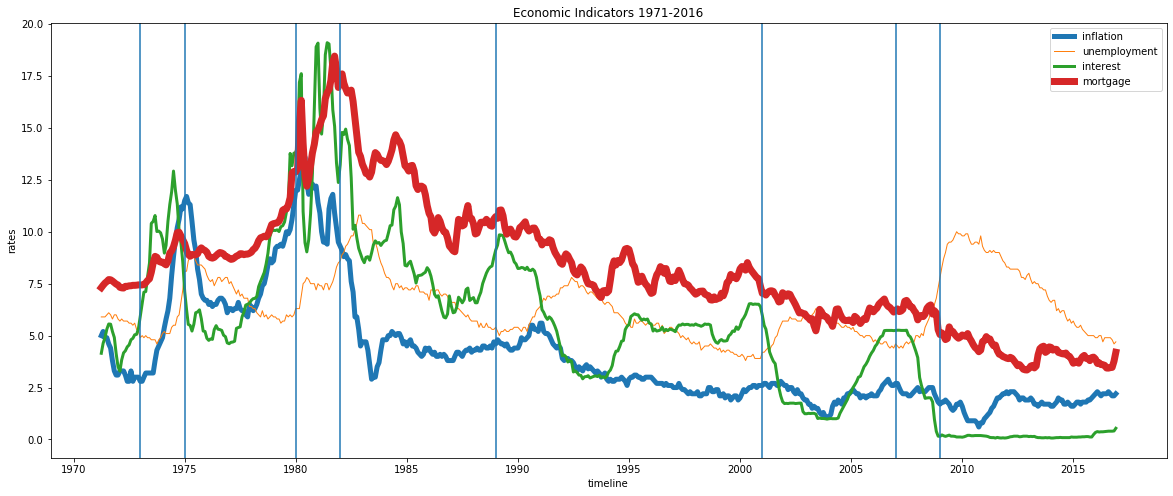

In [10]:
# matplotlib date format modules
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# define the date format
myFmt = mdates.DateFormatter('%Y')

# plot the data
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(rates['DATE'], rates['INFLATION'], label='inflation', linewidth=5)
ax.plot(rates['DATE'], rates['UNEMPLOYMENT'], label='unemployment', linewidth=1)
ax.plot(rates['DATE'], rates['INTEREST'], label='interest', linewidth=3)
ax.plot(rates['DATE'], rates['MORTGAGE'], label='mortgage', linewidth=7)

ax.set(ylabel='rates', xlabel='timeline', title='Economic Indicators {}-{}'.format(rates['DATE'].dt.year.min(),rates['DATE'].dt.year.max()))
# ax.set_title('US Metrics from {} to {}'.format(inflation_rates['DATE'].min().strftime('%Y'), inflation_rates['DATE'].max().strftime('%Y')))
ax.legend()

# inform axis that it is plotting dates
ax.xaxis_date() 

# use format specified as myFmt
ax.xaxis.set_major_formatter(myFmt);

# locate dates of financial crisis
financial_crisis = pd.to_datetime([1973, 1975, 1980, 1982, 1989, 2001, 2007, 2009], format='%Y')
for year in financial_crisis:
    ax.axvline(x = year)
    
plt.savefig('timeseries_rates.png')

In [11]:
#sns.lineplot(x=rates['DATE'],y=rates.loc[:,['INTEREST']]);
sns.tsplot(data=rates, time='DATE', value='INTEREST'):

SyntaxError: invalid syntax (<ipython-input-11-0c4037ef6968>, line 2)

This scatterplot represents the different inflation rates in the US over time, between 1954 and 2017.  It shows a downward trend for the majority of the timeline, with the maximum rate peaking close to 14%.  There are a few "mini" peaks, and we need to check if dates correspond to financial crisis in the US (ie. early and mid 1980's, 1990, 2000, and 2007).

Observations:

- unemployment spikes follow financial crisis, with peak around 10%
- dropping interest rates is a response to financial crisis
- 

# Plotting Functions

## Histogram

In [96]:
def summary_stat_plot(array, num_bins=20):
    
    #Plot a histogram for rand1.
#     plt.hist(array, bins=num_bins, color='c')
    sns.distplot(array)
    
    # Add a vertical line at the mean.
    plt.axvline(array.mean(), 
                color='b', 
                linestyle='solid', 
                linewidth=2, 
                label=f'mean: {round(array.mean(),2)}')

    # Add a vertical line at one standard deviation above the mean.
    plt.axvline(array.mean() + array.std(), 
                color='b', 
                linestyle='dashed', 
                linewidth=2, 
                label=f'±std: {round(array.std(),2)}')

    # Add a vertical line at one standard deviation below the mean.
    plt.axvline(array.mean() - array.std(), color='b', linestyle='dashed', linewidth=2)
    
    # Add legend with mean and std
    plt.legend(shadow=True,loc=0)
    
#     plt.savefig('hist_{}.png'.format(array.name))
    
    plt.show();

## QQ Plot

In [75]:
# QQ plot

def qq_plot(series, distribution='normal'):
    
    # Making two variables.
    rand1 = np.random.normal(0, 1, len(series))
    rand2 = np.random.gamma(5,1, len(series))

    # Sorting the values in ascending order.
    unknown_dist = series.sort_values()
    unknown_dist_mean = unknown_dist.mean()
    unknown_dist_std = unknown_dist.std()
    unknown_dist_norm = (unknown_dist - unknown_dist_mean) / unknown_dist_std
    rand1.sort()
    rand2.sort()
    
    # Plotting the variable against series.    
    if distribution == 'normal':
        plt.title('QQ Plot - Normal Distribution')
        plt.plot(unknown_dist, rand1, "o")
    elif distribution == 'gamma':
        plt.title('QQ Plot - Gamma Distribution')
        plt.plot(unknown_dist, rand2, "o")
    
#     plt.savefig('QQplot_{}.png'.format(series.name))
    
    plt.show();

# Inflation Rate

In [15]:
mean = rates['INFLATION'].mean()
median = rates['INFLATION'].median()
rate_min = rates['INFLATION'].min()
rate_max = rates['INFLATION'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

mean: 4.02149362477231
median: 3.0
min: 0.6
max: 13.6


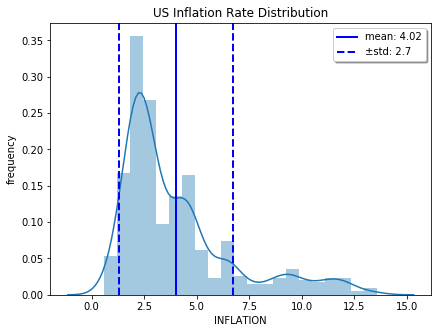

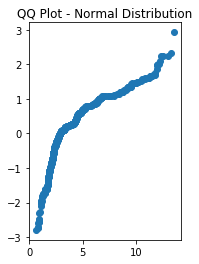

<Figure size 432x288 with 0 Axes>

In [106]:
plt.figure(figsize = [15,5])

# histogram
plt.subplot(1,2,1)
plt.title('US Inflation Rate Distribution')
plt.xlabel('inflation rates')
plt.ylabel('frequency')
summary_stat_plot(rates['INFLATION'])

# qq plot
plt.subplot(1,2,2)
qq_plot(rates['INFLATION'])

plt.tight_layout()

plt.savefig('variable_analysis_{}.png'.format(rates['INFLATION'].name));

From this spread, it is comforting to know that +7% rates are not the most common.  It looks like a gamma distribution.  

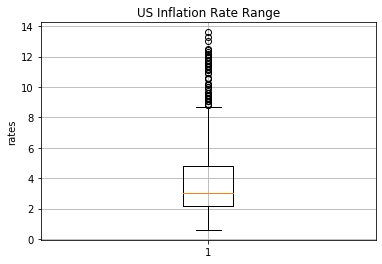

In [19]:
# boxplot
plt.boxplot(rates['INFLATION'])
plt.title('US Inflation Rate Range')
plt.ylabel('rates')
plt.grid();

# Unemployment Rate

In [20]:
mean = rates['UNEMPLOYMENT'].mean()
median = rates['UNEMPLOYMENT'].median()
rate_min = rates['UNEMPLOYMENT'].min()
rate_max = rates['UNEMPLOYMENT'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

mean: 6.376684881602911
median: 6.0
min: 3.8
max: 10.8


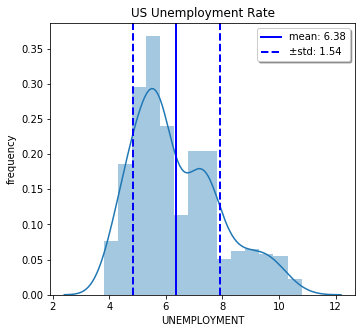

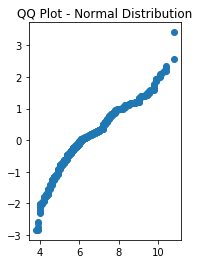

<Figure size 432x288 with 0 Axes>

In [98]:
plt.figure(figsize = [12,5])

# histogram
plt.subplot(1,2,1)
plt.title('US Unemployment Rate')
plt.xlabel('unemplyment rate')
plt.ylabel('frequency')
summary_stat_plot(rates['UNEMPLOYMENT'])

# qq plot
plt.subplot(1,2,2)
qq_plot(rates['UNEMPLOYMENT'])

plt.savefig('variable_analysis_{}.png'.format(rates['UNEMPLOYMENT'].name));

Looks like another gamma distribution.

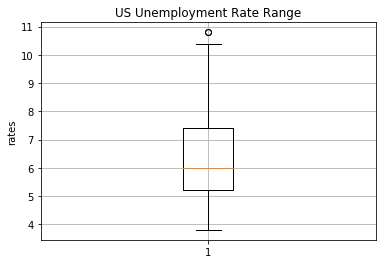

In [23]:
# boxplot
plt.boxplot(rates['UNEMPLOYMENT'])
plt.title('US Unemployment Rate Range')
plt.ylabel('rates')
plt.grid();

# InterEffective Federal Funds Rate

In [24]:
mean = rates['INTEREST'].mean()
median = rates['INTEREST'].median()
rate_min = rates['INTEREST'].min()
rate_max = rates['INTEREST'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

mean: 5.348287795992715
median: 5.25
min: 0.07
max: 19.1


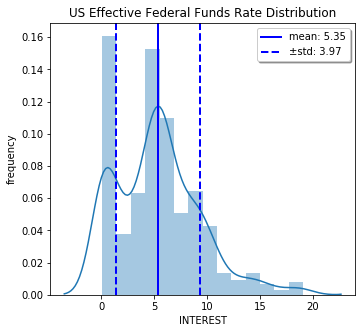

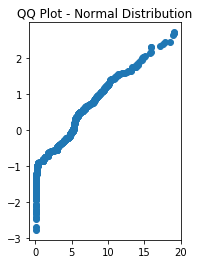

<Figure size 432x288 with 0 Axes>

In [99]:
plt.figure(figsize = [12,5])

# histogram
plt.subplot(1,2,1)
plt.title('US Effective Federal Funds Rate Distribution')
plt.xlabel('rates')
plt.ylabel('frequency')
summary_stat_plot(rates['INTEREST'])

# qq plot
plt.subplot(1,2,2)
qq_plot(rates['INTEREST'])

plt.savefig('variable_analysis_{}.png'.format(rates['INTEREST'].name));

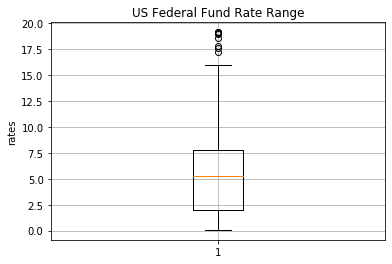

In [27]:
# boxplot
plt.boxplot(rates['INTEREST'])
plt.title('US Federal Fund Rate Range')
plt.ylabel('rates')
plt.grid();

# 30yr Mortgage Rate

In [28]:
mean = rates['MORTGAGE'].mean()
median = rates['MORTGAGE'].median()
rate_min = rates['MORTGAGE'].min()
rate_max = rates['MORTGAGE'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

mean: 8.250195810564668
median: 7.795
min: 3.345
max: 18.454


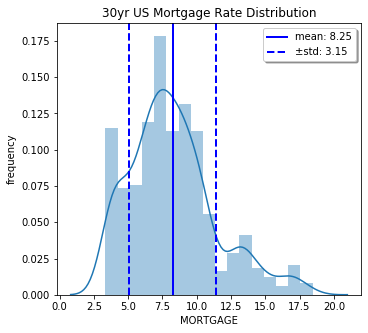

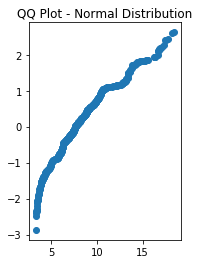

<Figure size 432x288 with 0 Axes>

In [100]:
plt.figure(figsize = [12,5])

# histogram
plt.subplot(1,2,1)
plt.title('30yr US Mortgage Rate Distribution')
plt.xlabel('rates')
plt.ylabel('frequency')
summary_stat_plot(rates['MORTGAGE'])

# qq plot
plt.subplot(1,2,2)
qq_plot(rates['MORTGAGE'])

plt.savefig('variable_analysis_{}.png'.format(rates['MORTGAGE'].name));

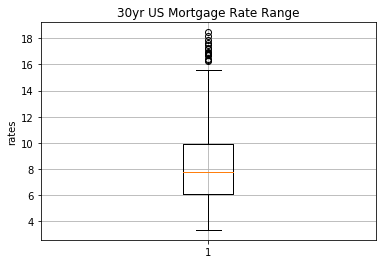

In [31]:
# boxplot
plt.boxplot(rates['MORTGAGE'])
plt.title('30yr US Mortgage Rate Range')
plt.ylabel('rates')
plt.grid();

# Finding Correlation

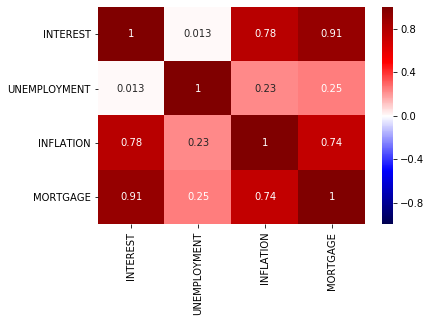

In [101]:
sns.heatmap(rates.corr(),cmap='seismic',annot=True, vmin=-1, vmax=1)

plt.savefig('heatmap.png');

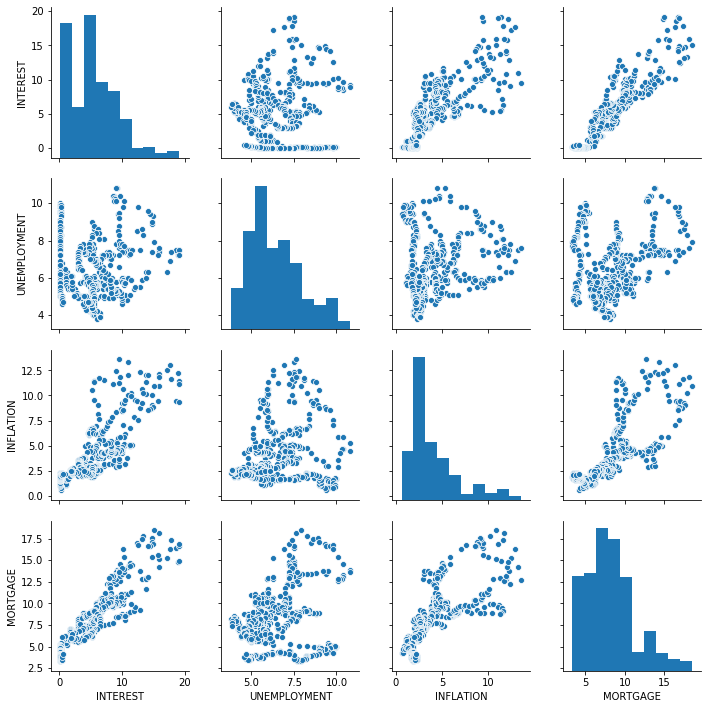

In [102]:
sns.pairplot(rates)
plt.savefig('pairplot.png');